<a href="https://colab.research.google.com/github/divyanshsaxena21/Face_Mask_Detection/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [6]:
!ls

data  face-mask-dataset.zip  sample_data


Importing the dependencies

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1783.jpg', 'with_mask_1890.jpg', 'with_mask_3489.jpg', 'with_mask_1469.jpg', 'with_mask_3104.jpg']
['with_mask_1306.jpg', 'with_mask_3666.jpg', 'with_mask_3344.jpg', 'with_mask_2340.jpg', 'with_mask_988.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_224.jpg', 'without_mask_49.jpg', 'without_mask_1615.jpg', 'without_mask_248.jpg', 'without_mask_2272.jpg']
['without_mask_1621.jpg', 'without_mask_649.jpg', 'without_mask_2508.jpg', 'without_mask_11.jpg', 'without_mask_3462.jpg']


In [10]:
print("NUmber of with mask",len(with_mask_files))
print("NUmber of without mask",len(without_mask_files))

NUmber of with mask 3725
NUmber of without mask 3828


**Creating labels**

In [11]:
#With mask -> 1
#Without mask ->0

In [12]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))

7553


Displaying the Images

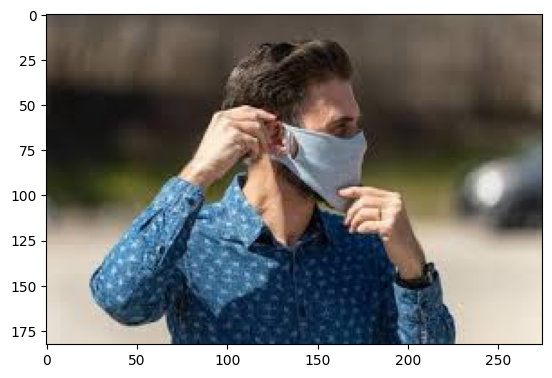

In [14]:
#Display with mask impages

img = mpimg.imread('/content/data/with_mask/with_mask_2590.jpg')
imgplot = plt.imshow(img)
plt.show()

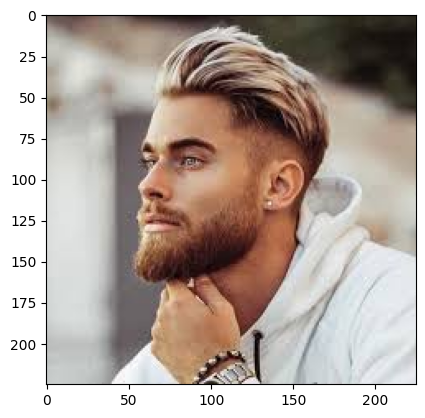

In [15]:
#Displaying image without mask

img = mpimg.imread('/content/data/without_mask/without_mask_2590.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1. Resize the images
2. Convert the images to numpy arrays

In [16]:
#Convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
len(data)

7553

array([[[195, 195, 197],
        [195, 195, 197],
        [195, 195, 197],
        ...,
        [191, 191, 192],
        [192, 193, 195],
        [192, 193, 195]],

       [[195, 195, 197],
        [195, 195, 197],
        [195, 195, 197],
        ...,
        [191, 191, 192],
        [191, 192, 194],
        [191, 192, 194]],

       [[194, 194, 196],
        [194, 194, 196],
        [194, 194, 196],
        ...,
        [191, 191, 191],
        [190, 191, 193],
        [190, 191, 193]],

       ...,

       [[233, 233, 233],
        [229, 229, 229],
        [227, 227, 227],
        ...,
        [233, 231, 234],
        [235, 235, 237],
        [235, 235, 237]],

       [[227, 227, 227],
        [222, 222, 222],
        [219, 219, 219],
        ...,
        [233, 232, 234],
        [228, 228, 230],
        [228, 228, 230]],

       [[230, 230, 230],
        [224, 224, 224],
        [222, 222, 222],
        ...,
        [236, 234, 237],
        [232, 232, 234],
        [232, 232, 234]]], dtype=uint8)
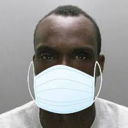

In [18]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 71,  71,  71],
        [ 73,  73,  73],
        [ 75,  75,  75],
        ...,
        [ 70,  70,  70],
        [ 70,  70,  70],
        [ 69,  69,  69]],

       [[ 66,  66,  66],
        [ 68,  68,  68],
        [ 70,  70,  70],
        ...,
        [ 65,  65,  65],
        [ 64,  64,  64],
        [ 62,  62,  62]],

       [[ 62,  62,  62],
        [ 63,  63,  63],
        [ 66,  66,  66],
        ...,
        [ 62,  62,  62],
        [ 60,  60,  60],
        [ 59,  59,  59]]], dtype=uint8)
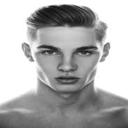

In [19]:
data[-1]

In [20]:
#Converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

Train test split


In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)


In [22]:
#Scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [23]:
X_train_scaled[0]

array([[[0.56078431, 0.44313725, 0.42745098],
        [0.58823529, 0.46666667, 0.45098039],
        [0.58039216, 0.4627451 , 0.43529412],
        ...,
        [0.28627451, 0.26666667, 0.24313725],
        [0.2745098 , 0.2627451 , 0.23529412],
        [0.2745098 , 0.2745098 , 0.24313725]],

       [[0.56078431, 0.45098039, 0.43529412],
        [0.56862745, 0.45490196, 0.43921569],
        [0.58039216, 0.46666667, 0.44313725],
        ...,
        [0.32941176, 0.30980392, 0.28627451],
        [0.2745098 , 0.2627451 , 0.23529412],
        [0.28627451, 0.29019608, 0.25882353]],

       [[0.51372549, 0.41568627, 0.41176471],
        [0.52156863, 0.41568627, 0.40392157],
        [0.56078431, 0.45098039, 0.43529412],
        ...,
        [0.36078431, 0.34117647, 0.31764706],
        [0.27843137, 0.27058824, 0.23921569],
        [0.30196078, 0.30588235, 0.2745098 ]],

       ...,

       [[0.22745098, 0.16078431, 0.13333333],
        [0.25098039, 0.18431373, 0.15686275],
        [0.2745098 , 0

**Building A CNN**

In [24]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [25]:
num_of_classes = 2

model = keras.Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_of_classes,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
#Compile the neural network

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])


In [27]:
#Training the Neural Network

history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 167s 971ms/step - acc: 0.7190 - loss: 0.6064 - val_acc: 0.8843 - val_loss: 0.2804
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 162s 956ms/step - acc: 0.8762 - loss: 0.3149 - val_acc: 0.9091 - val_loss: 0.2180
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 202s 955ms/step - acc: 0.9113 - loss: 0.2306 - val_acc: 0.8893 - val_loss: 0.2602
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 197s 927ms/step - acc: 0.9218 - loss: 0.2120 - val_acc: 0.9157 - val_loss: 0.2161
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 208s 963ms/step - acc: 0.9318 - loss: 0.1794 - val_acc: 0.9157 - val_loss: 0.1828


Model Evaluation


In [28]:
loss,accuracy = model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy =',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 235ms/step - acc: 0.9295 - loss: 0.1757
Test Accuracy = 0.9238914847373962


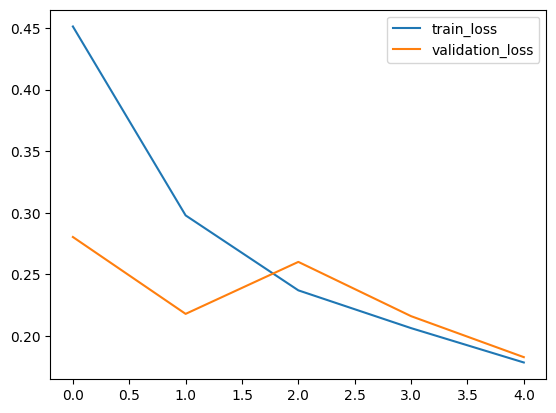

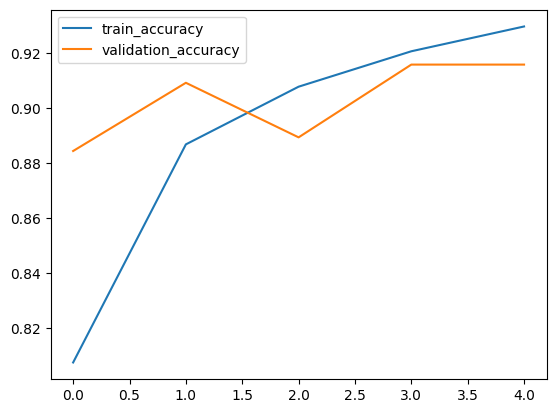

In [29]:
h = history

#Plot the loss value

plt.plot(h.history['loss'],label='train_loss')
plt.plot(h.history['val_loss'],label='validation_loss')
plt.legend()
plt.show()

#Plot the accuracy value

plt.plot(h.history['acc'],label='train_accuracy')
plt.plot(h.history['val_acc'],label='validation_accuracy')
plt.legend()
plt.show()

**Pridictive System**

Path of the image to be predicted: /content/face-mask-woman-1024x538.jpg


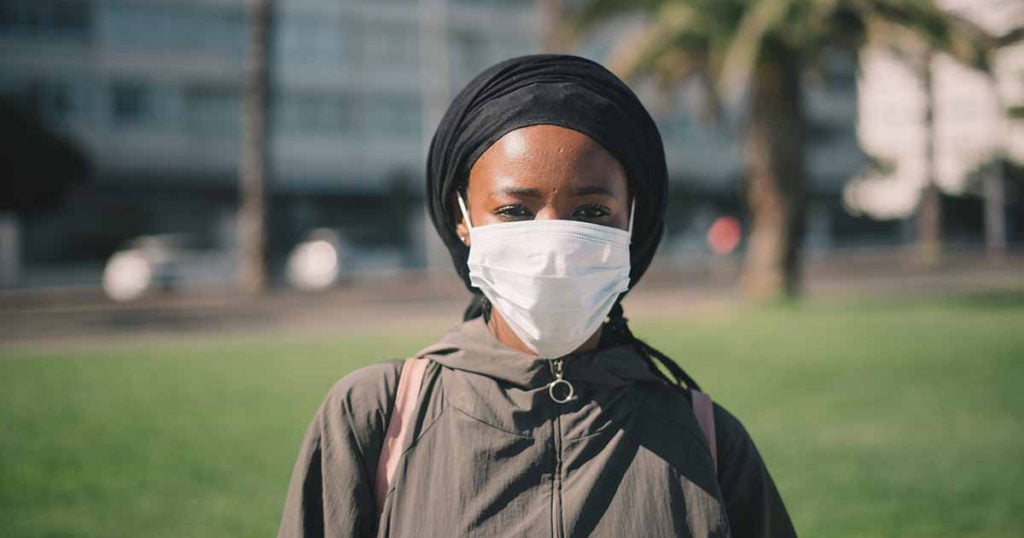

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[0.0977223 0.7981955]]
1
The person in the image is wearing a mask


In [33]:
input_imgage_path = input("Path of the image to be predicted: ")

input_image = cv2.imread(input_imgage_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print("The person in the image is wearing a mask")
else:
  print("The person in the image is not wearing a mask")

In [35]:
model.save('my_model.keras')

In [36]:
from keras.models import load_model
loaded_model = load_model('my_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
